<a href="https://colab.research.google.com/github/ubern-mia/bme-labs/blob/main/Session3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 3

Today, we will look into what features a classifier deems important for the decision it takes.

First, load the data againg (the same one you used last time).

In [4]:
from google.colab import files
! cd "/content"
uploaded = files.upload()

measurements = "/content/" + list(uploaded.keys())[0]

Saving fsfaststats.csv to fsfaststats.csv


As last time, define a training and testing split and define the feature columns. Then we will use a random forest classifier for the prediction. Instead of the cross-validation as last time, we use the full training set.

In [5]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, balanced_accuracy_score

# define a mapping of the disease encoding back to strings
diseasestatus = {0: "Healthy", 1: "ASD", 2: "Epilepsy"}

measurements = pd.read_csv("/content/fsfaststats.csv")

# map the disease name to the encoding and make sure the age is a float
measurements["Disease"] = [diseasestatus[e] for e in measurements["Disease"]]
measurements["Age"] = [float(e) for e in measurements["Age"]]

# X is the feature matrix we feed to the classifier, i.e. the measurements and the age of the subject
features = list(set(measurements.columns) - set(["Subject", "Disease"]))
X = measurements.loc[:, features]
y = measurements["Disease"]

# Reserve 20% of the data for testing
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(X, y):
  print("Training set size: " + str(len(train_index)))
  print("Test set size: " + str(len(test_index)))

X_train = X.iloc[train_index, :]
y_train = y.iloc[train_index]

X_test = X.iloc[test_index, :]
y_test = y.iloc[test_index]

# Plug in the parameter settings that work well according to your experiments
clf = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=42)

# Train the classifier and apply it to the test set
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Training set size: 1308
Test set size: 328


With this trained classifier, we can now get information on which features are the most important ones:

In [9]:
featimportances = clf.feature_importances_

# sort these in descending order and see which features they correspond to
sortidx = (-featimportances).argsort()
importances_sorted = featimportances[sortidx]
featurenames_sorted = X_train.columns[sortidx]
print(importances_sorted)
print(featurenames_sorted)

[0.02710246 0.02597046 0.02038501 0.01862411 0.01860064 0.01822966
 0.01802335 0.01605994 0.01601336 0.01520541 0.01465873 0.01317093
 0.01285156 0.01243088 0.01234425 0.01232067 0.01231842 0.01221544
 0.0120754  0.0119226  0.01144233 0.01123997 0.01118002 0.01095292
 0.01093893 0.01088695 0.01075438 0.01064844 0.01064831 0.01062673
 0.01058861 0.01044334 0.01038002 0.01031825 0.01029637 0.01014977
 0.0101289  0.00998746 0.00963526 0.00959617 0.00959613 0.00953955
 0.00944761 0.00936011 0.00933034 0.0092787  0.00926056 0.00922627
 0.00920803 0.00918881 0.00913957 0.00910865 0.00907959 0.00903172
 0.00902393 0.00889388 0.00886944 0.00884637 0.00880667 0.00880502
 0.00878514 0.00876033 0.00867504 0.00866088 0.00863269 0.00857453
 0.00857132 0.00849402 0.00842426 0.00839339 0.00833978 0.00832564
 0.0083241  0.00822961 0.00817452 0.00815904 0.00813439 0.00812219
 0.00810764 0.00797586 0.00783845 0.00781029 0.00780748 0.00771397
 0.00769332 0.00746301 0.00741354 0.00740994 0.00738853 0.0072

Let's plot the feature importances. Since they are so many, limit it to the top 15 features.

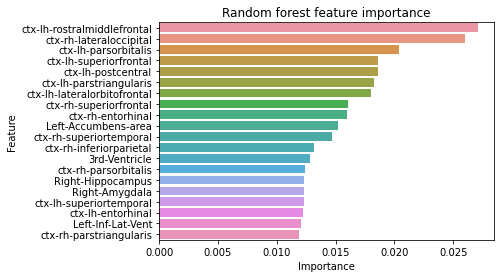

In [17]:
n_most_important = 20
sns.barplot(x=importances_sorted[:n_most_important], 
            y=featurenames_sorted[:n_most_important])
plt.title("Random forest feature importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

Now you know roughly which features seem to be the most important ones. Now try to see if you can already see the importance by looking at them individually. For this, you can (as we did during the previous sessions), plot the features. Replace the example below where the left hippocampus is selected with the most important feature. Please do this for the top three according to your previous findings.

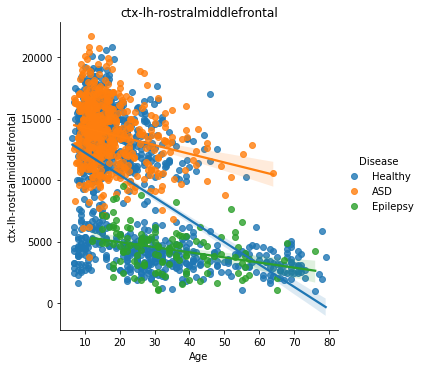

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plotcols = list(set(measurements.columns) - set(["Age", "Subject", "Disease"]))
feature = "Left-Hippocampus"

sns.lmplot(x="Age", y=feature, hue="Disease", data=measurements, ci=95)
plt.title(feature)
plt.show()